In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/home/sathish/Downloads/laptopData.csv")
df

Unnamed: 0 Company            TypeName  ...       OpSys  Weight        Price
0            0.0   Apple           Ultrabook  ...       macOS  1.37kg   71378.6832
1            1.0   Apple           Ultrabook  ...       macOS  1.34kg   47895.5232
2            2.0      HP            Notebook  ...       No OS  1.86kg   30636.0000
3            3.0   Apple           Ultrabook  ...       macOS  1.83kg  135195.3360
4            4.0   Apple           Ultrabook  ...       macOS  1.37kg   96095.8080
...          ...     ...                 ...  ...         ...     ...          ...
1298      1298.0  Lenovo  2 in 1 Convertible  ...  Windows 10   1.8kg   33992.6400
1299      1299.0  Lenovo  2 in 1 Convertible  ...  Windows 10   1.3kg   79866.7200
1300      1300.0  Lenovo            Notebook  ...  Windows 10   1.5kg   12201.1200
1301      1301.0      HP            Notebook  ...  Windows 10  2.19kg   40705.9200
1302      1302.0    Asus            Notebook  ...  Windows 10   2.2kg   19660.3200

[1303 rows x 12 columns]

In [4]:
# Drop the data
remove=['Unnamed: 0']
df.drop(remove,inplace=True,axis=1)

In [5]:
df=pd.DataFrame(df)

In [6]:
df

Company            TypeName Inches  ...       OpSys  Weight        Price
0      Apple           Ultrabook   13.3  ...       macOS  1.37kg   71378.6832
1      Apple           Ultrabook   13.3  ...       macOS  1.34kg   47895.5232
2         HP            Notebook   15.6  ...       No OS  1.86kg   30636.0000
3      Apple           Ultrabook   15.4  ...       macOS  1.83kg  135195.3360
4      Apple           Ultrabook   13.3  ...       macOS  1.37kg   96095.8080
...      ...                 ...    ...  ...         ...     ...          ...
1298  Lenovo  2 in 1 Convertible     14  ...  Windows 10   1.8kg   33992.6400
1299  Lenovo  2 in 1 Convertible   13.3  ...  Windows 10   1.3kg   79866.7200
1300  Lenovo            Notebook   65.4  ...  Windows 10   1.5kg   12201.1200
1301      HP            Notebook   15.6  ...  Windows 10  2.19kg   40705.9200
1302    Asus            Notebook   15.6  ...  Windows 10   2.2kg   19660.3200

[1303 rows x 11 columns]

In [7]:
df.head()

Company   TypeName Inches  ...  OpSys  Weight        Price
0   Apple  Ultrabook   13.3  ...  macOS  1.37kg   71378.6832
1   Apple  Ultrabook   13.3  ...  macOS  1.34kg   47895.5232
2      HP   Notebook   15.6  ...  No OS  1.86kg   30636.0000
3   Apple  Ultrabook   15.4  ...  macOS  1.83kg  135195.3360
4   Apple  Ultrabook   13.3  ...  macOS  1.37kg   96095.8080

[5 rows x 11 columns]

In [8]:
df.tail()

Company            TypeName Inches  ...       OpSys  Weight     Price
1298  Lenovo  2 in 1 Convertible     14  ...  Windows 10   1.8kg  33992.64
1299  Lenovo  2 in 1 Convertible   13.3  ...  Windows 10   1.3kg  79866.72
1300  Lenovo            Notebook   65.4  ...  Windows 10   1.5kg  12201.12
1301      HP            Notebook   15.6  ...  Windows 10  2.19kg  40705.92
1302    Asus            Notebook   15.6  ...  Windows 10   2.2kg  19660.32

[5 rows x 11 columns]

In [9]:
df.shape

(1303, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1253 non-null   object 
 2   Inches            1220 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1259 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1259 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [11]:
df.describe()

Price
count    1273.000000
mean    59955.814073
std     37332.251005
min      9270.720000
25%     31914.720000
50%     52161.120000
75%     79333.387200
max    324954.720000

In [12]:
miss=df.isnull().mean()*100

In [13]:
miss

Company             2.302379
TypeName            3.837299
Inches              6.369916
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 3.376823
Memory              2.302379
Gpu                 2.302379
OpSys               2.302379
Weight              3.376823
Price               2.302379
dtype: float64

In [14]:
columns_to_impute = miss[miss< 30].index
print("\nColumns with less than 30% missing values to be imputed:")
print(columns_to_impute)


Columns with less than 30% missing values to be imputed:
Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [15]:
for column in columns_to_impute:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        print(f"Filling missing values in column '{column}' with mode: {mode_value}")
        df[column].fillna(mode_value, inplace=True)
    else:
        median_value = df[column].median()
        print(f"Filling missing values in column '{column}' with median: {median_value}")
        df[column].fillna(median_value, inplace=True)

Filling missing values in column 'Company' with mode: Lenovo
Filling missing values in column 'TypeName' with mode: Notebook
Filling missing values in column 'Inches' with mode: 15.6
Filling missing values in column 'ScreenResolution' with mode: Full HD 1920x1080
Filling missing values in column 'Cpu' with mode: Intel Core i5 7200U 2.5GHz
Filling missing values in column 'Ram' with mode: 8GB
Filling missing values in column 'Memory' with mode: 256GB SSD
Filling missing values in column 'Gpu' with mode: Intel HD Graphics 620
Filling missing values in column 'OpSys' with mode: Windows 10
Filling missing values in column 'Weight' with mode: 2.2kg
Filling missing values in column 'Price' with median: 52161.12


/tmp/ipykernel_2954/803970568.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_2954/803970568.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   object 
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [17]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
2. Exploratory Data Analysis (EDA):
Univariate Analysis


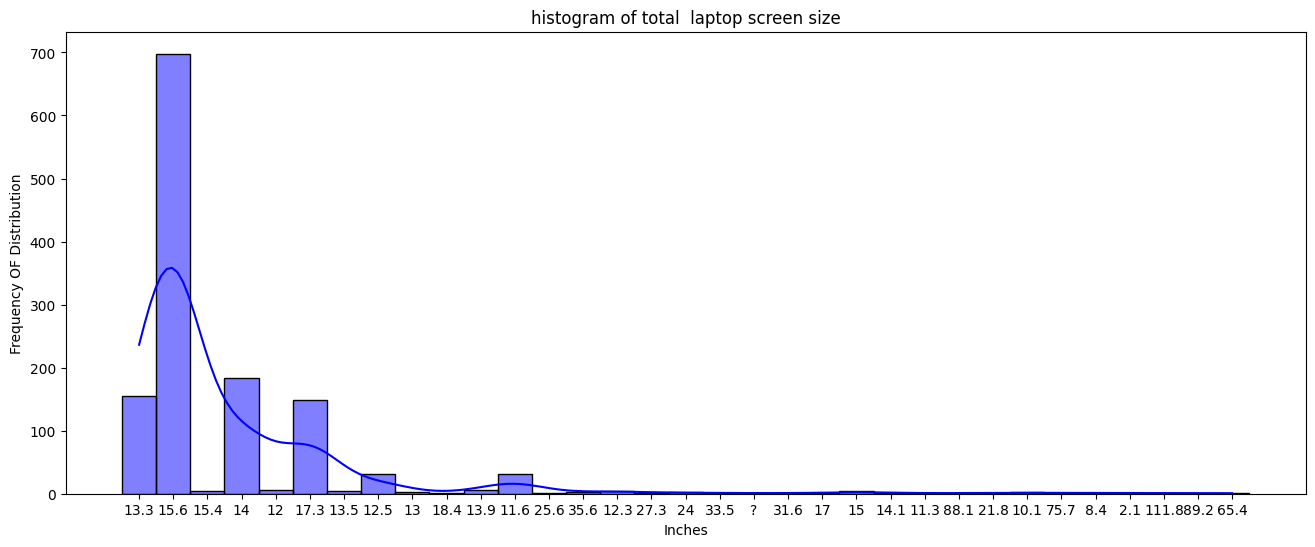

In [75]:
plt.figure(figsize=(16, 6))
sns.histplot(df['Inches'], kde=True, color='blue', bins=30)
plt.title('histogram of total  laptop screen size')
plt.xlabel('Inches')
plt.ylabel('Frequency OF Distribution')
plt.show()

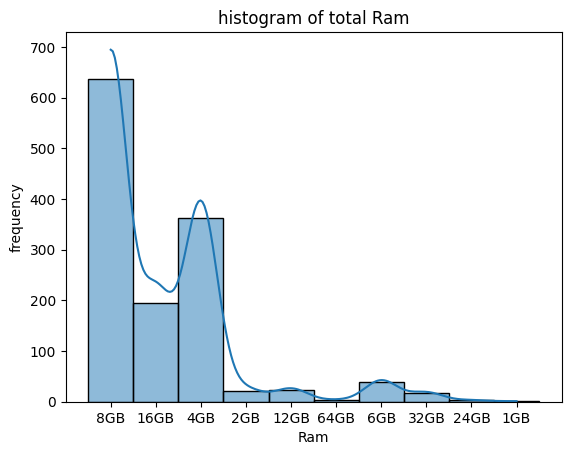

In [25]:
sns.histplot(df['Ram'],kde=True)
plt.title('histogram of total Ram')
plt.xlabel('Ram')
plt.ylabel('frequency')
plt.show()

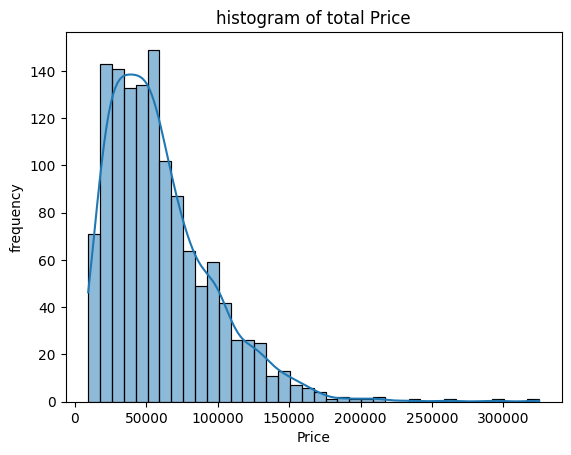

In [26]:
sns.histplot(df['Price'],kde=True)
plt.title('histogram of total Price')
plt.xlabel('Price')
plt.ylabel('frequency')
plt.show()

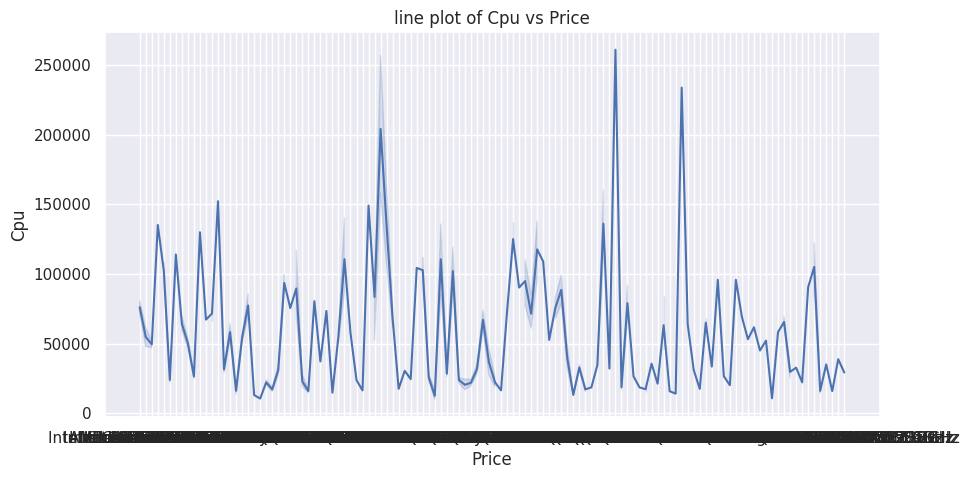

In [209]:
# line plot[relationship]
sns.lineplot(x="Cpu",y="Price",data=df)
plt.title('line plot of Cpu vs Price')
plt.xlabel('Price')
plt.ylabel('Cpu')
plt.show()

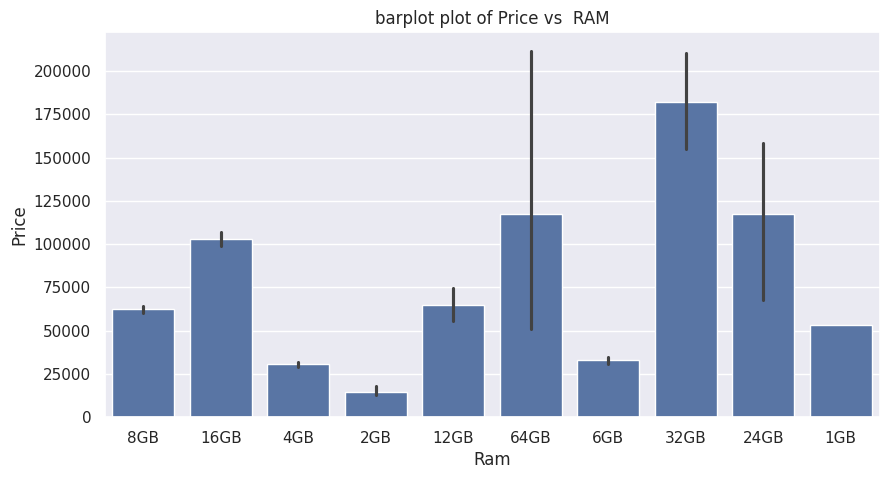

In [214]:
sns.barplot(x="Ram",y="Price",data=df)
plt.title('barplot plot of Price vs  RAM')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()
#sns.boxplot(x='time',y='total_bill',data=tip_data)
#plt.title('box plot of total bill by time of day')
#plt.xlabel('time of day')
#plt.ylabel('total_bill')
#plt.show()


In [44]:
df1=df.groupby(['Cpu']).count()

In [45]:
df1

Company  TypeName  ...  Weight  Price
Cpu                                                      ...               
AMD A10-Series 9600P 2.4GHz                 2         2  ...       2      2
AMD A10-Series 9620P 2.5GHz                 2         2  ...       2      2
AMD A10-Series A10-9620P 2.5GHz             2         2  ...       2      2
AMD A12-Series 9700P 2.5GHz                 1         1  ...       1      1
AMD A12-Series 9720P 2.7GHz                 2         2  ...       2      2
...                                       ...       ...  ...     ...    ...
Intel Pentium Quad Core N4200 1.1GHz       14        14  ...      14     14
Intel Xeon E3-1505M V6 3GHz                 2         2  ...       2      2
Intel Xeon E3-1535M v5 2.9GHz               1         1  ...       1      1
Intel Xeon E3-1535M v6 3.1GHz               1         1  ...       1      1
Samsung Cortex A72&A53 2.0GHz               1         1  ...       1      1

[118 rows x 10 columns]

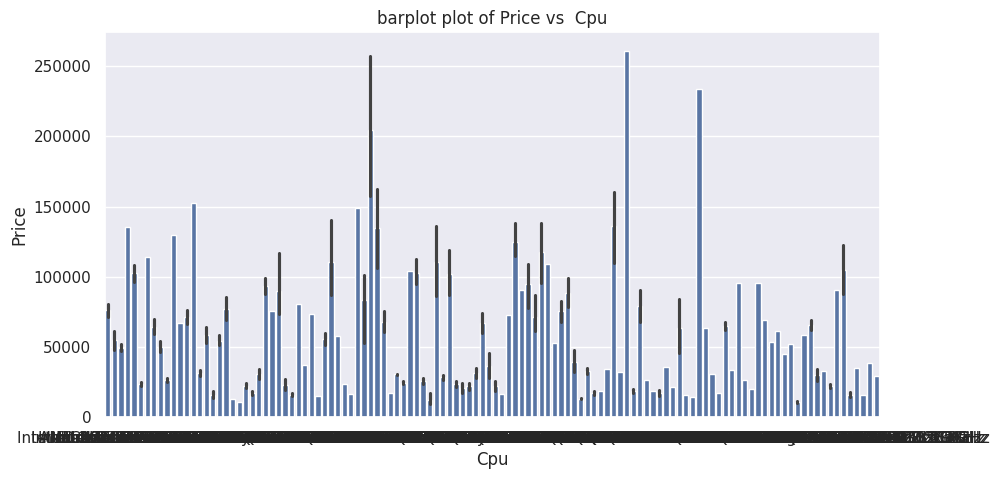

In [212]:
sns.barplot(x="Cpu",y="Price",data=df)
plt.title('barplot plot of Price vs  Cpu')
plt.xlabel('Cpu')
plt.ylabel('Price')
plt.show()

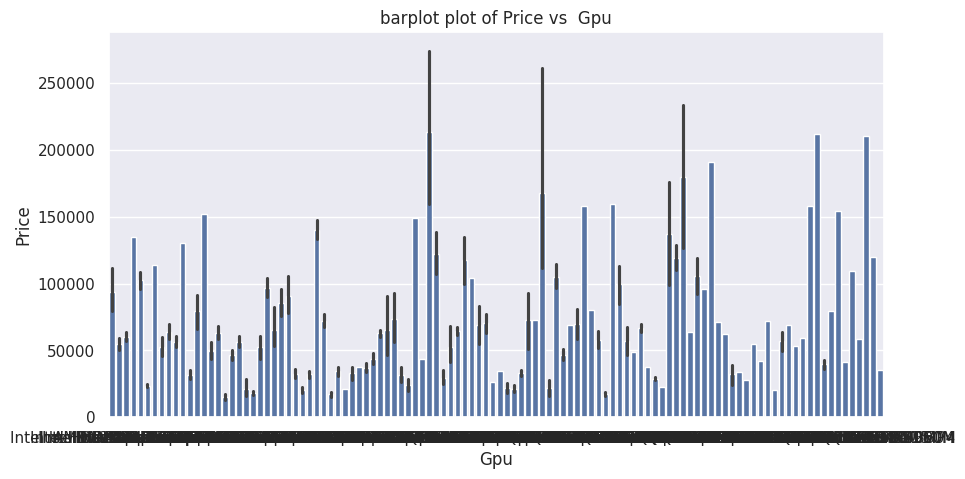

In [213]:
sns.barplot(x="Gpu",y="Price",data=df)
plt.title('barplot plot of Price vs  Gpu')
plt.xlabel('Gpu')
plt.ylabel('Price')
plt.show()

In [66]:
df2=df1.iloc[:,0]

In [67]:
df2

Cpu
AMD A10-Series 9600P 2.4GHz              2
AMD A10-Series 9620P 2.5GHz              2
AMD A10-Series A10-9620P 2.5GHz          2
AMD A12-Series 9700P 2.5GHz              1
AMD A12-Series 9720P 2.7GHz              2
                                        ..
Intel Pentium Quad Core N4200 1.1GHz    14
Intel Xeon E3-1505M V6 3GHz              2
Intel Xeon E3-1535M v5 2.9GHz            1
Intel Xeon E3-1535M v6 3.1GHz            1
Samsung Cortex A72&A53 2.0GHz            1
Name: Company, Length: 118, dtype: int64

<Axes: xlabel='Cpu', ylabel='count'>

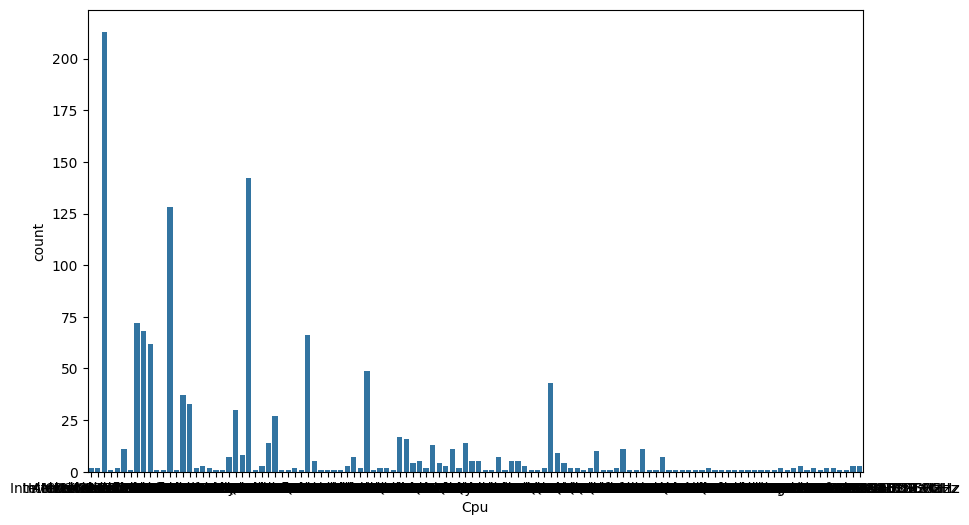

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(df,x="Cpu")

In [104]:
df1=df.groupby(['Cpu']).count()

In [105]:
df1

Company  TypeName  ...  Weight  Price
Cpu                                                      ...               
AMD A10-Series 9600P 2.4GHz                 2         2  ...       2      2
AMD A10-Series 9620P 2.5GHz                 2         2  ...       2      2
AMD A10-Series A10-9620P 2.5GHz             2         2  ...       2      2
AMD A12-Series 9700P 2.5GHz                 1         1  ...       1      1
AMD A12-Series 9720P 2.7GHz                 2         2  ...       2      2
...                                       ...       ...  ...     ...    ...
Intel Pentium Quad Core N4200 1.1GHz       14        14  ...      14     14
Intel Xeon E3-1505M V6 3GHz                 2         2  ...       2      2
Intel Xeon E3-1535M v5 2.9GHz               1         1  ...       1      1
Intel Xeon E3-1535M v6 3.1GHz               1         1  ...       1      1
Samsung Cortex A72&A53 2.0GHz               1         1  ...       1      1

[118 rows x 10 columns]

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
dg=df

In [84]:
dg

Company            TypeName Inches  ...       OpSys  Weight        Price
0      Apple           Ultrabook   13.3  ...       macOS  1.37kg   71378.6832
1      Apple           Ultrabook   13.3  ...       macOS  1.34kg   47895.5232
2         HP            Notebook   15.6  ...       No OS  1.86kg   30636.0000
3      Apple           Ultrabook   15.4  ...       macOS  1.83kg  135195.3360
4      Apple           Ultrabook   13.3  ...       macOS  1.37kg   96095.8080
...      ...                 ...    ...  ...         ...     ...          ...
1298  Lenovo  2 in 1 Convertible     14  ...  Windows 10   1.8kg   33992.6400
1299  Lenovo  2 in 1 Convertible   13.3  ...  Windows 10   1.3kg   79866.7200
1300  Lenovo            Notebook   65.4  ...  Windows 10   1.5kg   12201.1200
1301      HP            Notebook   15.6  ...  Windows 10  2.19kg   40705.9200
1302    Asus            Notebook   15.6  ...  Windows 10   2.2kg   19660.3200

[1303 rows x 11 columns]

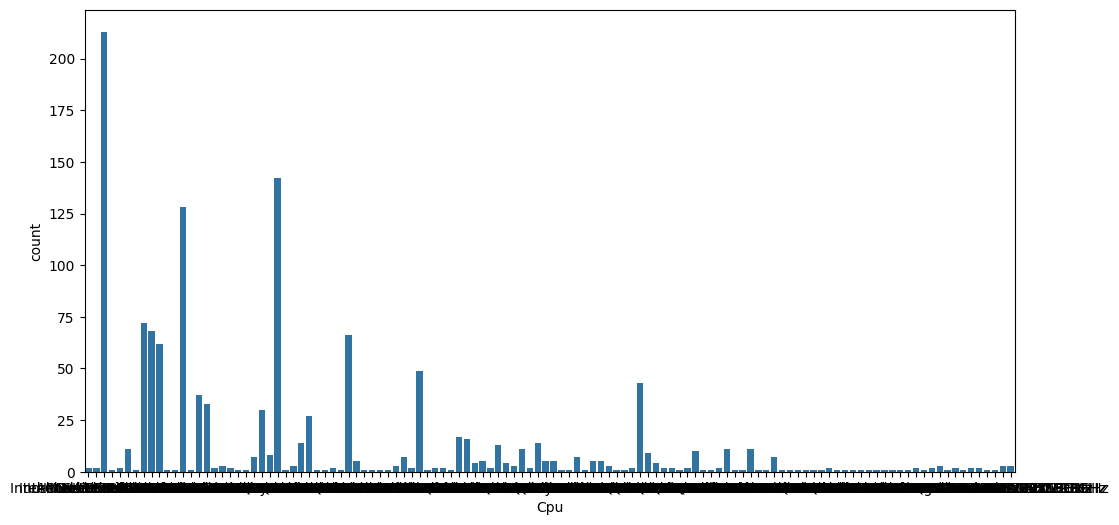

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(dg,x="Cpu")
plt.show()

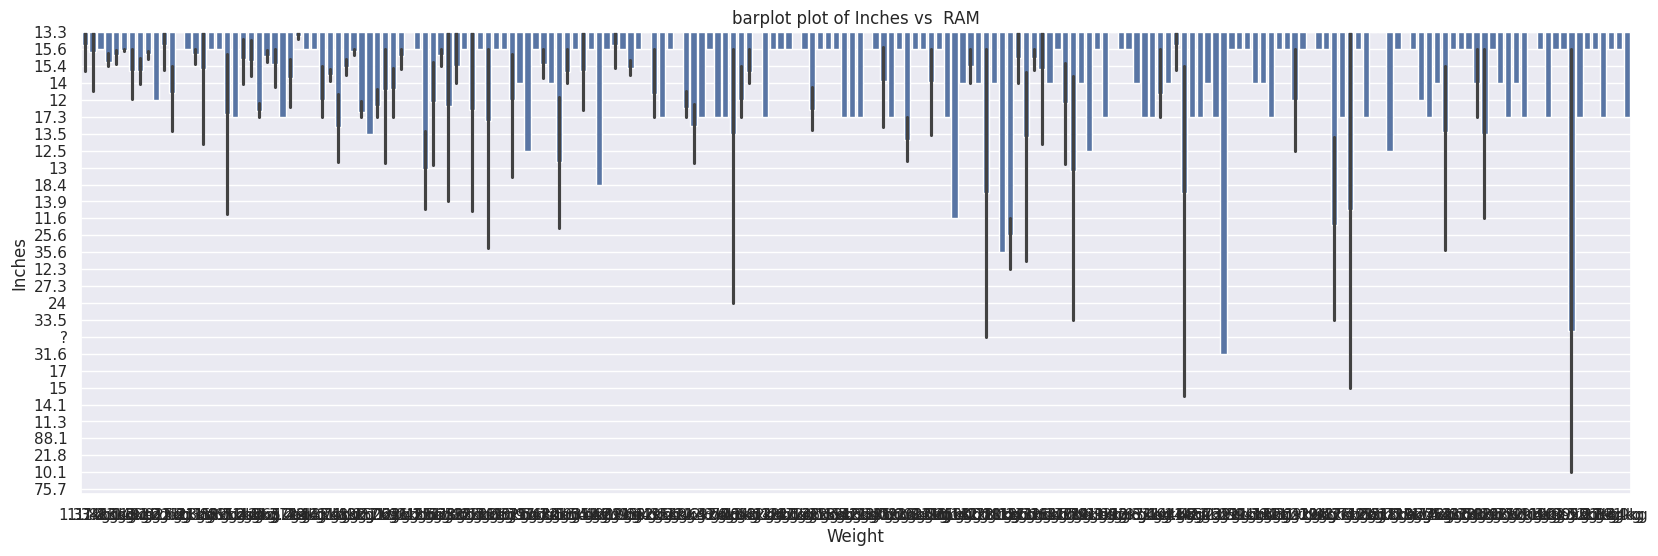

In [216]:
plt.figure(figsize=(20,6))
sns.barplot(x="Weight",y="Inches",data=df)
plt.title('barplot plot of Inches vs  RAM')
plt.xlabel('Weight')
plt.ylabel('Inches')
plt.show()

In [98]:
df5=df.groupby(['Weight']).count()

In [99]:
df5

Company  TypeName  Inches  ...  Gpu  OpSys  Price
Weight                                ...                   
0.00008kg        1         1       1  ...    1      1      1
0.0002kg         1         1       1  ...    1      1      1
0.69kg           3         3       3  ...    3      3      3
0.81kg           2         2       2  ...    2      2      2
0.91kg           1         1       1  ...    1      1      1
...            ...       ...     ...  ...  ...    ...    ...
7.2kg            2         2       2  ...    2      2      2
8.23kg           1         1       1  ...    1      1      1
8.4kg            1         1       1  ...    1      1      1
9kg              1         1       1  ...    1      1      1
?                1         1       1  ...    1      1      1

[196 rows x 10 columns]

In [124]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
label_encoders = {}
dfcopy = df.copy()
categorical_columns = ['Company','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight']

for i in categorical_columns:
    dfcopy[i] = label.fit_transform(dfcopy[i])  # Changed 'encoded_df' to 'dfcopy'
    label_encoders[i] = label

In [152]:
categorical_data = dfcopy[categorical_columns]
numerical_data = dfcopy[['Price']]

In [153]:
categorical_data.head()

Company  TypeName  Inches  ScreenResolution  ...  Memory  Gpu  OpSys  Weight
0        1         4       8                23  ...       4   58      8      40
1        1         4       8                 1  ...       2   51      8      37
2        7         3      15                 8  ...      16   53      4      75
3        1         4      14                25  ...      29    9      8      72
4        1         4       8                23  ...      16   59      8      40

[5 rows x 10 columns]

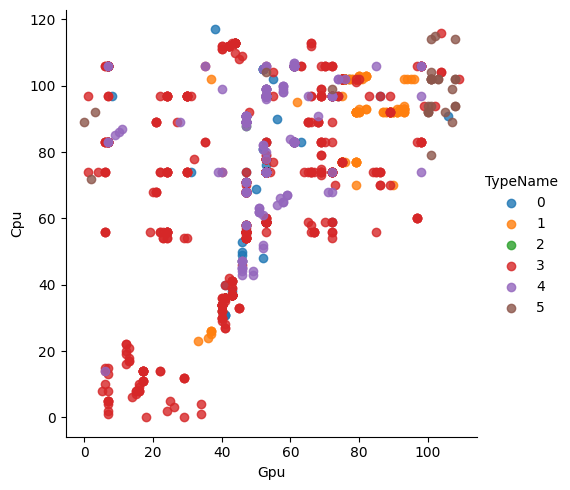

In [154]:
sns.lmplot(x='Gpu',y='Cpu',hue='TypeName',fit_reg=False,data=categorical_data)

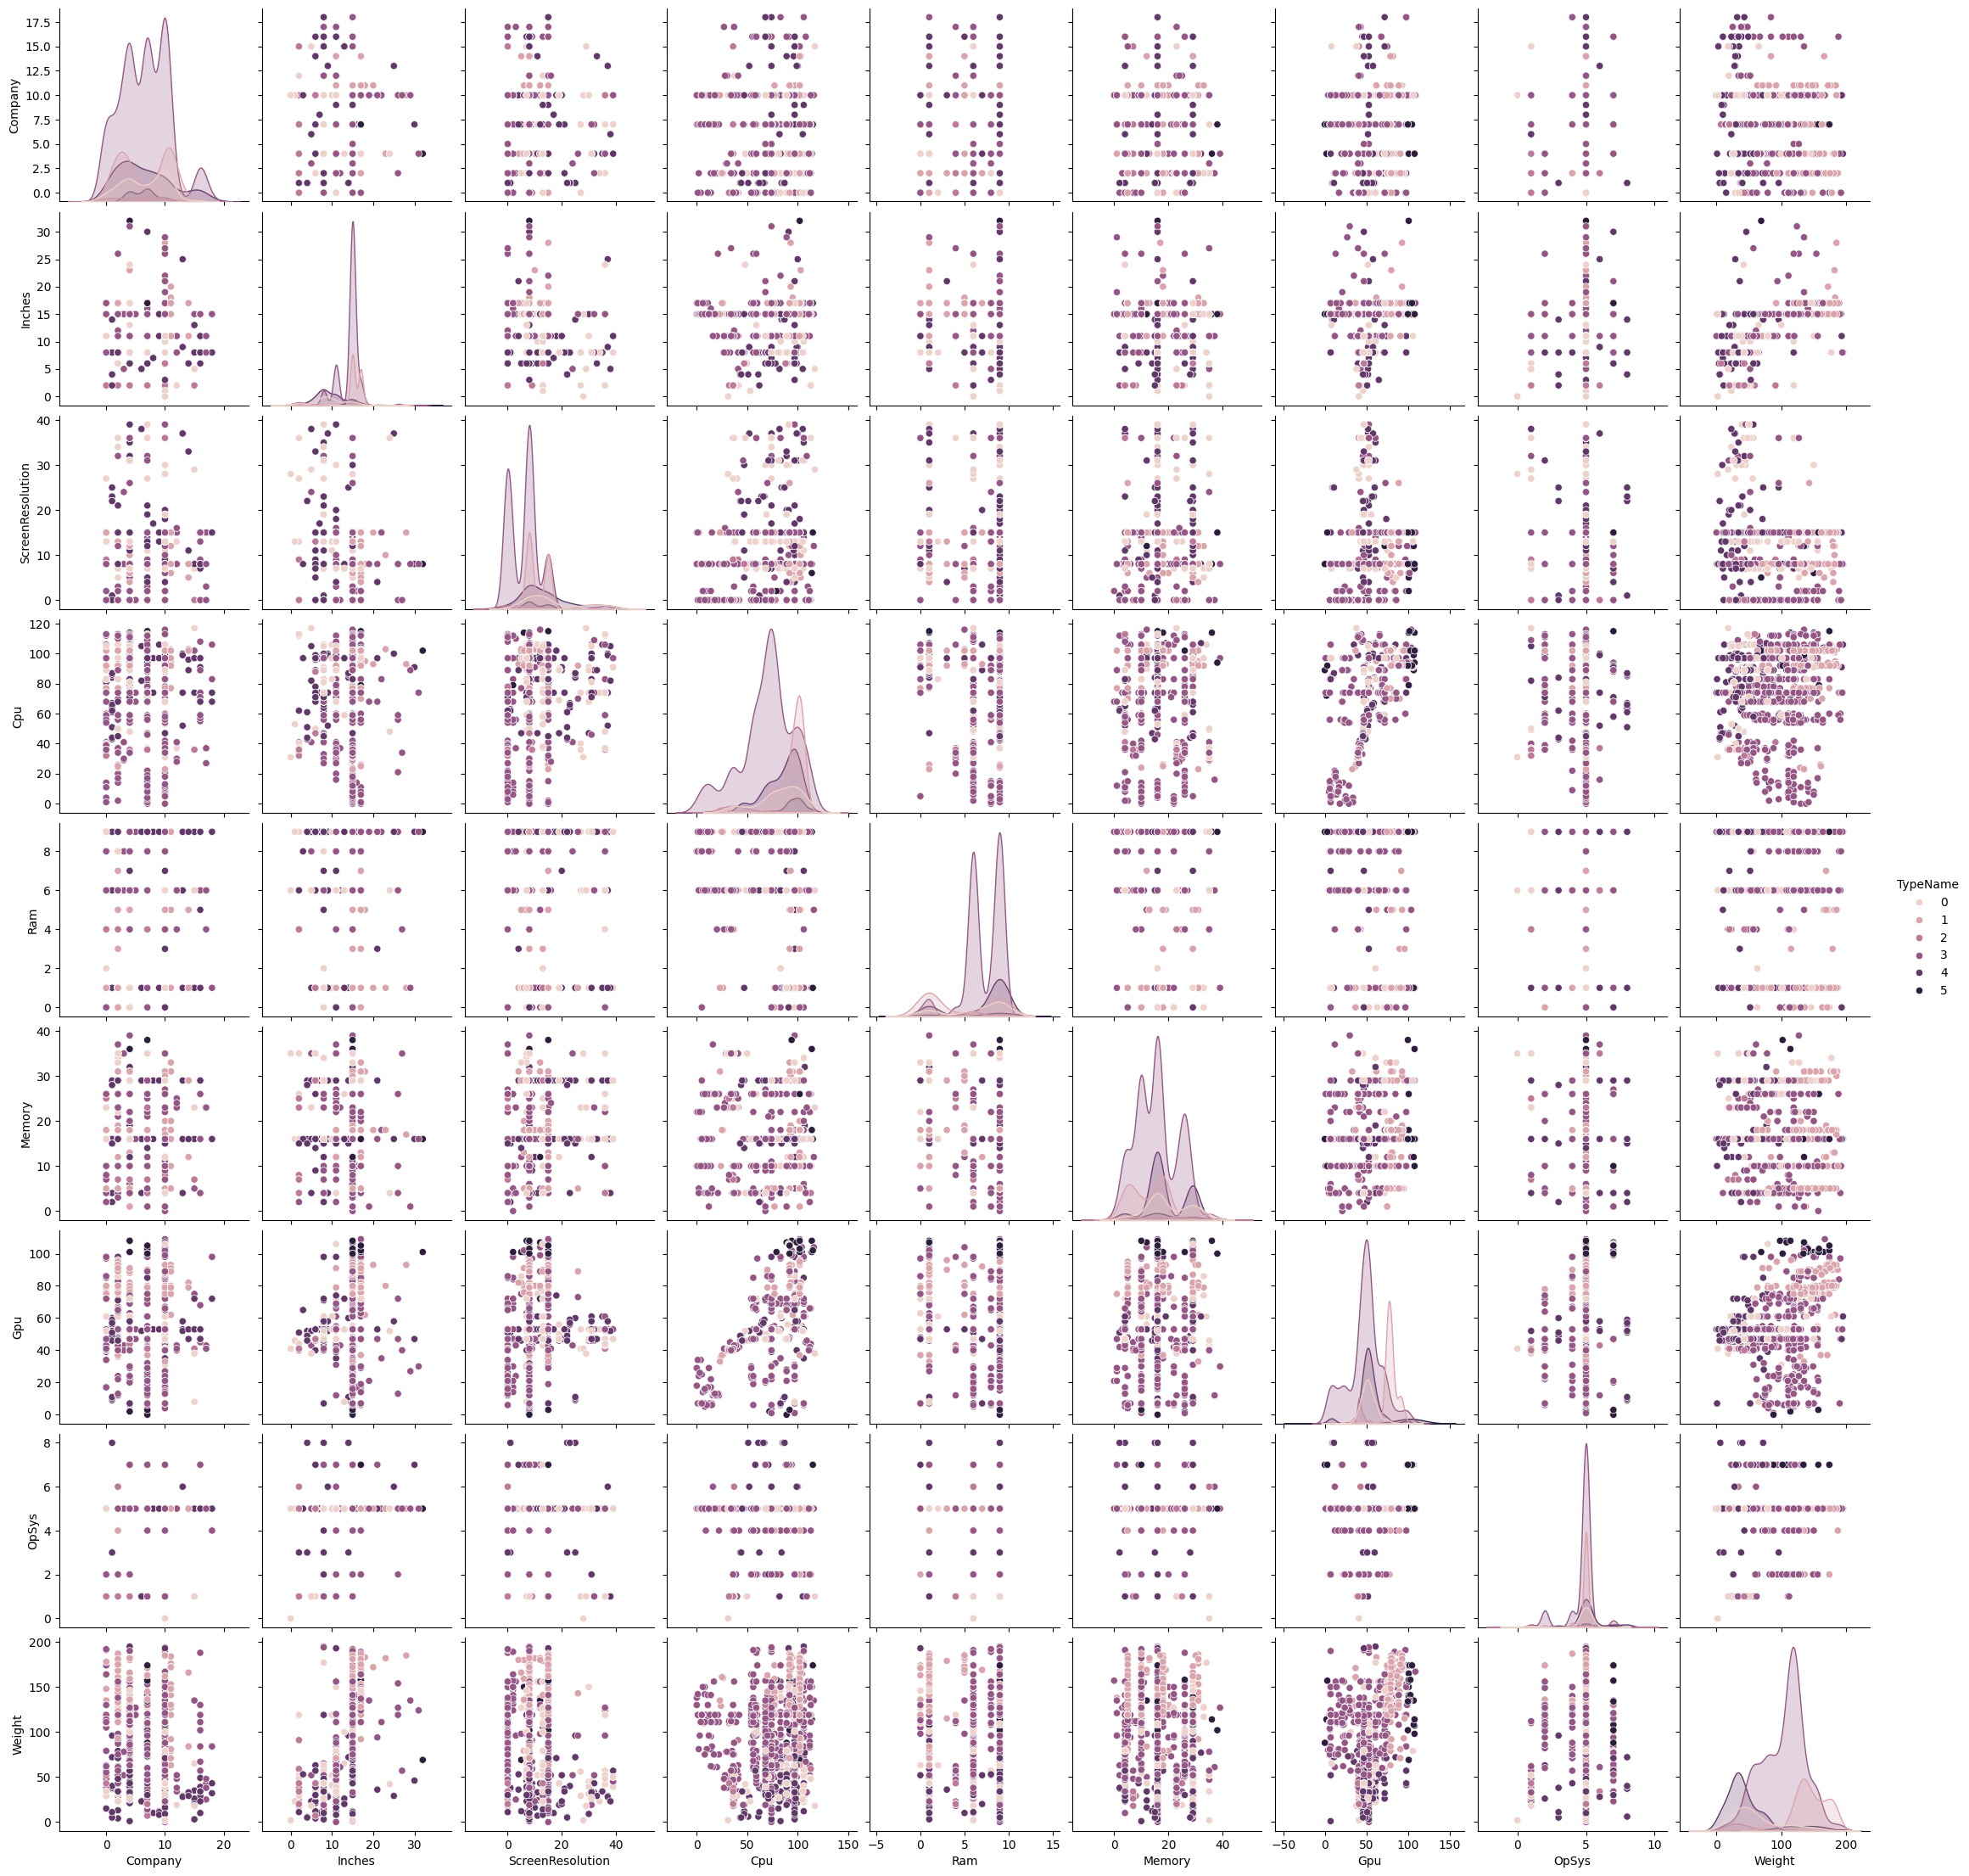

In [155]:
sns.pairplot(hue='TypeName',data=categorical_data)

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [158]:
df_mean = categorical_data.groupby(['Company']).mean().reset_index()
df_mean

Company  TypeName     Inches  ...        Gpu     OpSys      Weight
0         0  2.601942  13.126214  ...  56.912621  4.106796  108.970874
1         1  4.000000   7.714286  ...  46.952381  6.095238   35.476190
2         2  2.179487  13.878205  ...  62.628205  4.717949  117.269231
3         3  3.000000  11.666667  ...  41.000000  5.000000   69.333333
4         4  2.679443  13.623693  ...  50.261324  4.668990  101.114983
5         5  3.000000  15.000000  ...  50.000000  5.000000  123.000000
6         6  4.000000   5.000000  ...  52.000000  1.000000   23.000000
7         7  2.906015  13.082707  ...  49.928571  5.071429   83.330827
8         8  4.000000   7.000000  ...  53.000000  5.000000   10.000000
9         9  4.000000  13.666667  ...  53.000000  5.000000   10.333333
10       10  2.484375  13.387500  ...  55.012500  4.887500   98.384375
11       11  1.000000  15.830189  ...  79.792453  5.000000  132.377358
12       12  2.571429   8.857143  ...  41.428571  5.000000   42.142857
13       13  4.000000  11.666667  ...  55.333333  6.000000   28.333333
14       14  1.857143  11.285714  ...  71.571429  5.000000   92.285714
15       15  2.777778   9.444444  ...  49.555556  4.111111   35.888889
16       16  3.255319  11.574468  ...  51.489362  5.085106   67.659574
17       17  3.000000  10.250000  ...  42.000000  5.000000   38.500000
18       18  3.500000  11.500000  ...  91.500000  4.250000   60.750000

[19 rows x 10 columns]

In [159]:
numerical_data.head()

Price
0   71378.6832
1   47895.5232
2   30636.0000
3  135195.3360
4   96095.8080

In [163]:
from sklearn.feature_selection import chi2
target = dfcopy['Cpu'] # Using 'CPU' as target for chi2
f_p_values=chi2(categorical_data,target)

In [164]:
f_p_values

(array([  718.82823874,   243.12437336,   515.38408199,  3007.36527112,
        10580.95249031,   418.30042627,  1265.36308318,  6126.57837601,
          118.64670388, 11804.79948374]),
 array([2.76738636e-087, 7.34648380e-011, 2.21102737e-051, 0.00000000e+000,
        0.00000000e+000, 1.75225670e-035, 7.09296861e-192, 0.00000000e+000,
        4.40107830e-001, 0.00000000e+000]))

In [165]:
p_values=pd.Series(f_p_values[1])
p_values.index=categorical_data.columns
print('P_values with Cpu:')
p_values

P_values with Cpu:


Company              2.767386e-87
TypeName             7.346484e-11
Inches               2.211027e-51
ScreenResolution     0.000000e+00
Cpu                  0.000000e+00
Ram                  1.752257e-35
Memory              7.092969e-192
Gpu                  0.000000e+00
OpSys                4.401078e-01
Weight               0.000000e+00
dtype: float64

In [ ]:
According to this the smallest P-Value is "Memory - 7.092969e-192".

In [174]:
import matplotlib.pyplot

In [175]:
boston=categorical_data.corr()

<Axes: >

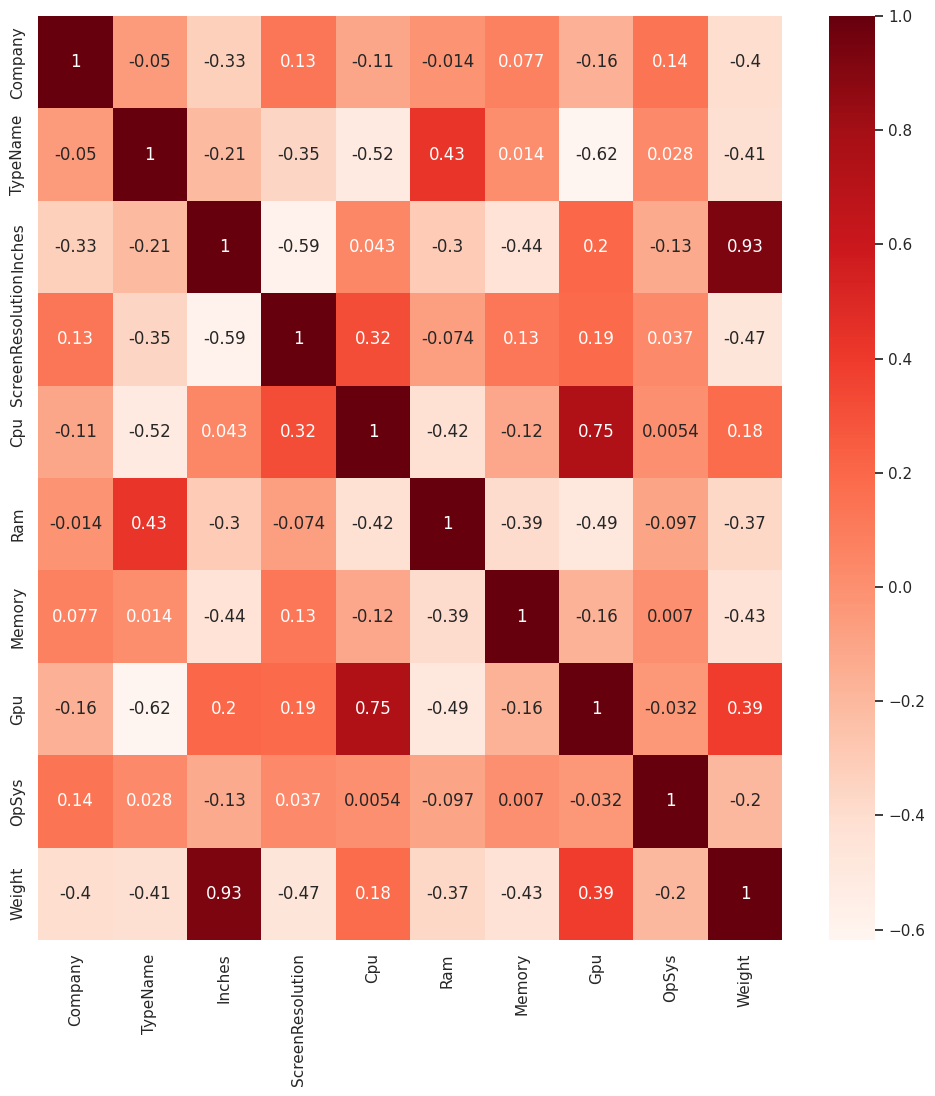

In [176]:
corr = boston.corr()
matplotlib.pyplot.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='Reds')

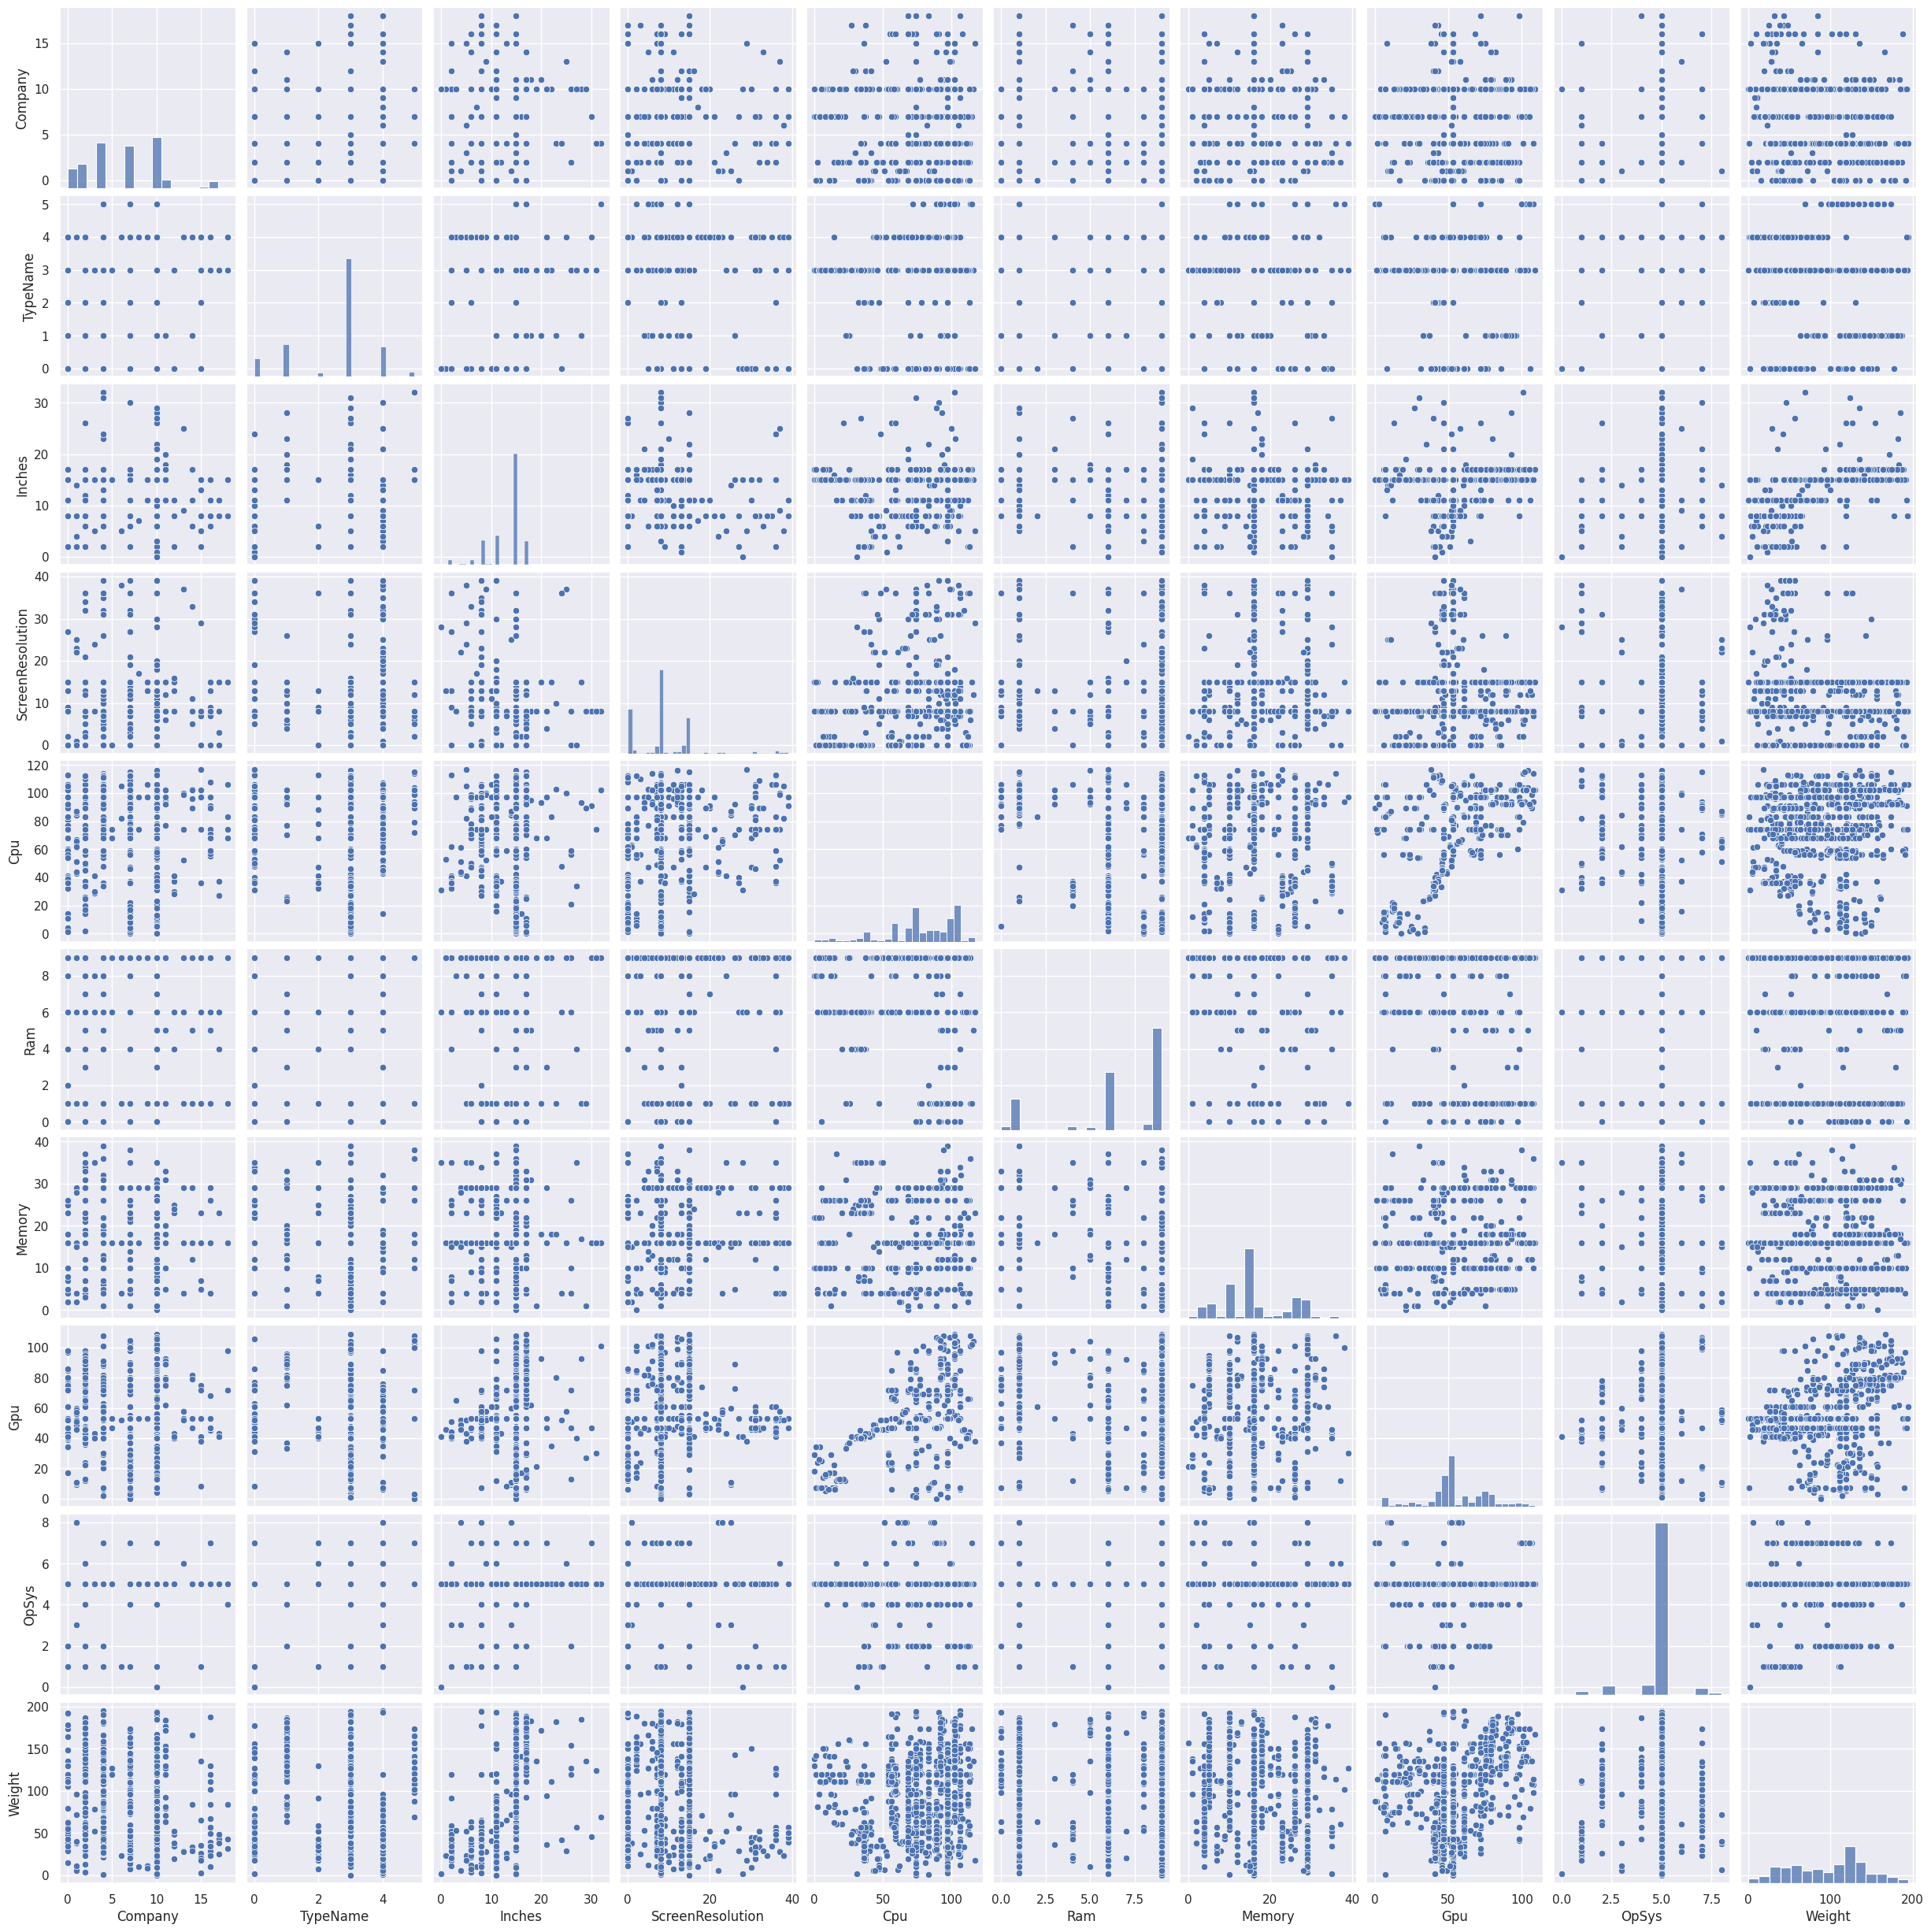

In [178]:
sns.pairplot(categorical_data)

In [182]:
from sklearn.feature_selection import chi2

In [183]:
chi2,pvalue=chi2(categorical_data,target)

In [184]:
chi2,pvalue

(array([  718.82823874,   243.12437336,   515.38408199,  3007.36527112,
        10580.95249031,   418.30042627,  1265.36308318,  6126.57837601,
          118.64670388, 11804.79948374]),
 array([2.76738636e-087, 7.34648380e-011, 2.21102737e-051, 0.00000000e+000,
        0.00000000e+000, 1.75225670e-035, 7.09296861e-192, 0.00000000e+000,
        4.40107830e-001, 0.00000000e+000]))

/tmp/ipykernel_2954/3409212848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_columns, y=chi2, palette='viridis')


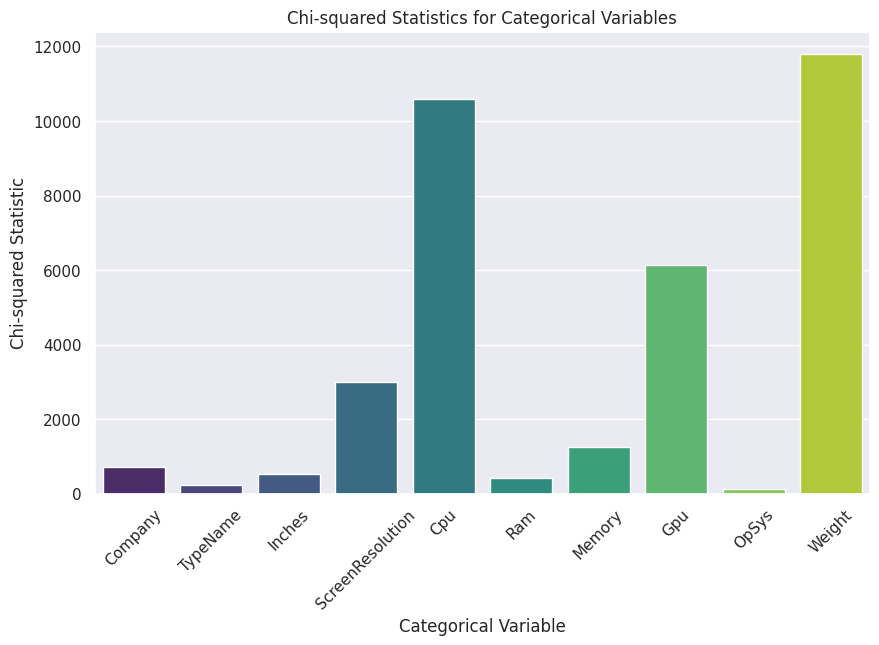

/tmp/ipykernel_2954/3409212848.py:10: RuntimeWarning: divide by zero encountered in log
  sns.barplot(x=categorical_columns, y=-np.log(pvalue), palette='viridis')
/tmp/ipykernel_2954/3409212848.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_columns, y=-np.log(pvalue), palette='viridis')


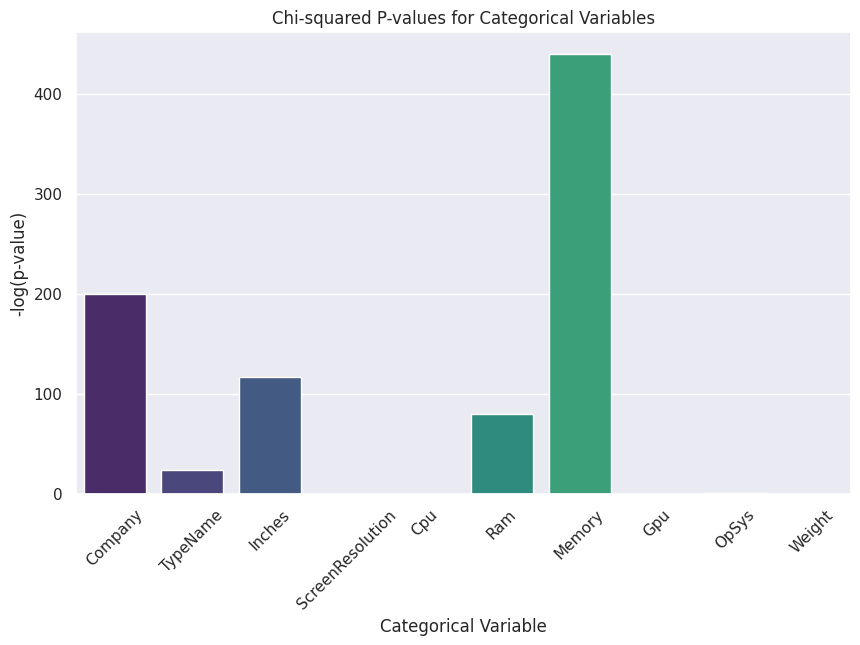

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_columns, y=chi2, palette='viridis')
plt.title('Chi-squared Statistics for Categorical Variables')
plt.ylabel('Chi-squared Statistic')
plt.xlabel('Categorical Variable')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_columns, y=-np.log(pvalue), palette='viridis')
plt.title('Chi-squared P-values for Categorical Variables')
plt.ylabel('-log(p-value)')
plt.xlabel('Categorical Variable')
plt.xticks(rotation=45)
plt.show()

In [191]:
x1 = dfcopy
y = dfcopy['Price']

In [192]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(x1,y)
selected_features = x1.columns[fit.get_support()]

In [193]:
selected_features

Index(['Cpu', 'Price'], dtype='object')

In [194]:
anova_stats, anova_p_values = f_classif(categorical_data, df['Cpu'])
anova_results_cat = pd.DataFrame({'Feature': categorical_columns, 'F-Stat': anova_stats, 'P-value': anova_p_values})

/home/sathish/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [195]:
anova_results_cat

Feature     F-Stat        P-value
0           Company   2.775101   4.300013e-18
1          TypeName   4.833945   4.099556e-46
2            Inches   5.490022   4.607770e-55
3  ScreenResolution   5.503289   3.046887e-55
4               Cpu        inf   0.000000e+00
5               Ram   3.301466   4.450028e-25
6            Memory   3.411902   1.420291e-26
7               Gpu  12.960516  5.169867e-144
8             OpSys   7.318770   3.655163e-79
9            Weight   7.497500   1.935016e-81

In [198]:
x = dfcopy[['Price']]

In [199]:
x

Price
0      71378.6832
1      47895.5232
2      30636.0000
3     135195.3360
4      96095.8080
...           ...
1298   33992.6400
1299   79866.7200
1300   12201.1200
1301   40705.9200
1302   19660.3200

[1303 rows x 1 columns]

In [200]:
f_p_values=f_classif(x,y)
f_p_values

(array([1.23172987e+15]), array([0.]))

In [201]:
f_p_values=pd.Series(f_p_values[1])
f_p_values.index=x.columns
f_p_values

Price    0.0
dtype: float64

In [202]:
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(x,y)
selected_features = x.columns[fit.get_support()]

/home/sathish/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=2 is greater than n_features=1. All the features will be returned.
  warnings.warn(


In [203]:
selected_features

Index(['Price'], dtype='object')

/home/sathish/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/tmp/ipykernel_2954/630594450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_data.columns, y=anova_stats, palette='magma')


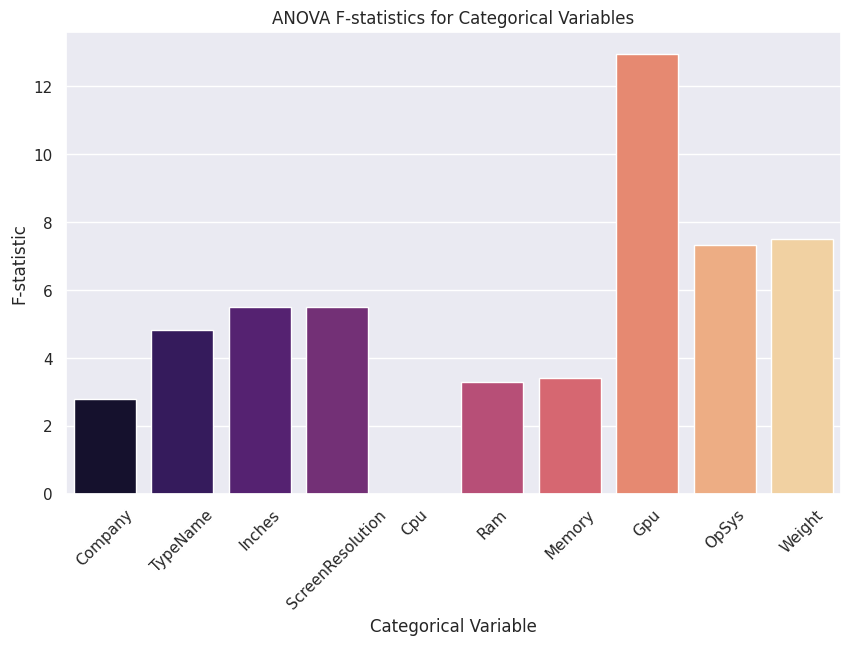

In [204]:
anova_stats, _ = f_classif(categorical_data, target)

# Create bar plots for ANOVA F-test results
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_data.columns, y=anova_stats, palette='magma')
plt.title('ANOVA F-statistics for Categorical Variables')
plt.ylabel('F-statistic')
plt.xlabel('Categorical Variable')
plt.xticks(rotation=45)
plt.show()

/home/sathish/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/tmp/ipykernel_2954/3953122461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_data.columns, y=p_values, palette='magma')


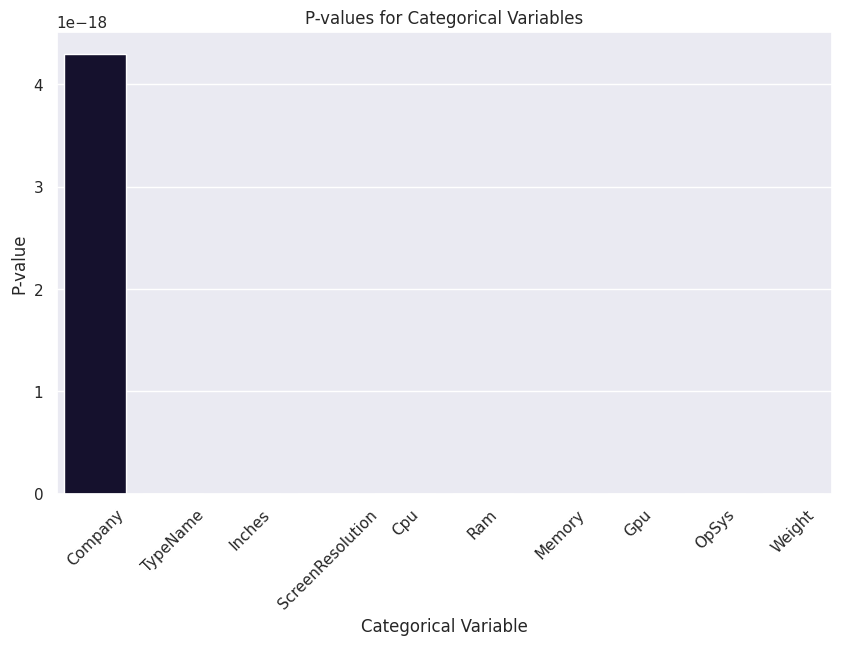

In [205]:
anova_stats, p_values = f_classif(categorical_data, target)

plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_data.columns, y=p_values, palette='magma')
plt.title('P-values for Categorical Variables')
plt.ylabel('P-value')
plt.xlabel('Categorical Variable')
plt.xticks(rotation=45)
plt.show()